### 12-8. 프로젝트 : 나랑 닮은 연예인을 찾아보자

지금부터는 위에서 배운 내용을 토대로 연예인 사진과 나를 비교해 보는 시간을 갖도록 하겠습니다!

##### Step1. 사진 모으기
___
비교하려면 사진을 모아야겠죠? 우선 나만 볼테니 내 사진과 비교해 보고 싶은 연예인 사진을 모아봅시다. 평소에 닮았다고 생각했던 연예인 사진들을 모두 모아보는 것도 좋을 것 같네요.
사진을 하나의 디렉토리 안에 모아 봅시다. 모을 때 사진의 파일명은 가급적 장동건.jpg, 김태희.png와 같이 파일명이 사람 이름이 들어 있도록 하는 것이 좋습니다. (설마 이분들과 닮았다고 생각하시는 것은?? 😅)

**1. 내 사진 찍기**  
* 내 사진을 2장 이상 포함합시다.
* 내 사진들끼리의 얼굴 임베딩 벡터 거리를 구해 봅시다. 닮았음을 확인할 수 있는 좋은 베이스라인이 될 수 있습니다.
* 혹시 내 사진들끼리의 거리가 멀게 나온다면 왜 그럴지 생각해 봅시다.

**2. 비교할 연예인 사진 모으기**  
* 많이 모을 수록 나와 더 닮은 연예인을 찾을 가능성이 높아질 것입니다.
* 주위의 동료들과 모은 사진을 주고받는 것도 하나의 방법입니다.

In [ ]:
# 이미지 크롤링
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
from urllib.parse import quote_plus
import os

baseUrl = 'https://search.naver.com/search.naver?where=image&sm=tab_jum&query='
plusUrl = input('검색어를 입력하세요 : ')

url = baseUrl + quote_plus(plusUrl)
html = urlopen(url)
soup = bs(html, "html.parser")
img = soup.find_all(class_='_img')

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/sele/'
dir_name = plusUrl
os.mkdir(dir_path + "/" + dir_name + "/")
path = dir_path + '/' + dir_name + '/'

n = 1
for i in img:
    imgUrl = i['data-source']
    with urlopen(imgUrl) as f:
        with open(path +plusUrl+str(n)+'.jpg','wb') as h: # w - write b - binary
            img = f.read()
            h.write(img)
    n += 1

print('다운로드 완료')

##### Step2. 얼굴 영역 자르기
___
임베딩 추출을 위해서는 얼굴 영역을 잘라줘야 합니다. 위 Step1.에서 찾은 이미지들을 이전에 만들었던 **get_gropped_face(image_file)**을 통해서 잘라줍시다! 자른 이미지는 PIL의 **Image.fromarray**를 통해서 PIL Image로 변환한 뒤에 저장을 해두면 다양한 재미있는 시각화를 시도해 보는데 도움이 될 것입니다.

```
#    힌트
#    from PIL import Image
#    face = get_gropped_face(image_path)
#    pillow_image = Image.fromarray(face)
#    pillow_image.save(path_to_save)
```

In [1]:
import face_recognition
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

image_path = os.getenv('HOME')+'/aiffel/face_embedding/image/이안 굿펠로우.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)
a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]

    return cropped_face

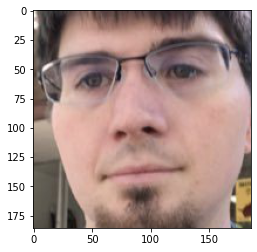

In [2]:
cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

##### Step3. 얼굴 영역의 임베딩 추출하기  
___
이제 얼굴 영역으로 잘린 이미지들이 여럿 생겼을텐데요. 그 이미지를 **face_recognition** 를 사용해서 이미지를 불러오고 임베딩을 추출해 봅시다. 다른 사람의 임베딩은 구분할 수 있게 따로 저장해 주세요. 이전에 만들었던 다음 함수들을 활용하면 손쉽게 수행 가능합니다.

* def get_face_embedding(face) : 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수
* def get_face_embedding_dict(dir_path) : 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수


In [3]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/image'
file_list = os.listdir(dir_path)
image_file = os.path.join(dir_path, '이안 굿펠로우.jpg')
face = get_gropped_face(image_file)

def get_face_embedding(face):
    return face_recognition.face_encodings(face)

def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]

    return embedding_dict

In [4]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['이안 굿펠로우']

array([-0.08390649,  0.07227162,  0.00817023,  0.02709038, -0.05647036,
       -0.00838839, -0.07071567, -0.05572446,  0.07408275, -0.08047565,
        0.21333283, -0.01625809, -0.20569015, -0.12488939,  0.00551048,
        0.06648698, -0.15644766, -0.16603571, -0.09029977, -0.00146133,
        0.07261996, -0.0383072 , -0.01593826,  0.09548932, -0.18765225,
       -0.38729945, -0.05450284, -0.13029754,  0.06198454, -0.07979127,
       -0.10092495,  0.01302634, -0.16881803, -0.04611037,  0.01391017,
        0.1168898 ,  0.02492316, -0.11216317,  0.21413529, -0.03017613,
       -0.16805726, -0.00568594, -0.02149365,  0.27180281,  0.24128546,
       -0.02587263,  0.05216951, -0.03345932,  0.20853919, -0.24063864,
        0.08949598,  0.16905251,  0.24159262,  0.10293064,  0.08163185,
       -0.13575968, -0.00076863,  0.1359988 , -0.18918952,  0.00780442,
       -0.07382393, -0.05094459,  0.07127566, -0.144024  ,  0.21641001,
        0.06193448, -0.14888957, -0.07630897,  0.16168   , -0.15

##### Step4. 모은 연예인들과 비교하기
___
모은 연예인 사진들과 자신의 얼굴 사진에서 추출한 임베딩 벡터들 간의 거리를 비교해 보고 가장 작은 연예인이 누구인지 찾아봅시다!

이전 스텝에서 만들었던 **get_nearest_face(name, top=5)** 함수들을 응용하면 손쉽게 수행 가능합니다.

In [5]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 : 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [6]:
get_nearest_face('주호민')

순위 1 : 이름(김광현), 거리(0.4360259142872931)
순위 2 : 이름(기성용), 거리(0.4472769504462801)
순위 3 : 이름(서장훈), 거리(0.4549985310869835)
순위 4 : 이름(정형돈), 거리(0.455156214361398)
순위 5 : 이름(윤경신), 거리(0.4573342784316166)


##### Step5. 다양한 재미있는 시각화 시도해 보기
___
비단 닮은 꼴 연예인을 찾기만 할 것이 아니라, 그들의 얼굴 사진을 활용하여 재미있는 시각화를 시도해 보시기 바랍니다.  
tkinter나 flask를 활용해서 닮은꼴을 찾을 이미지를 업로드한 후 그 이미지와 닮은 얼굴을 찾는 형태로 구현해 보는 것도 재미있을 것입니다.
여러분들의 재치가 넘치는 작품들을 기대합니다. 😎

In [7]:
%run camera.ipynb

rectangles[[(111, 82) (379, 350)]]


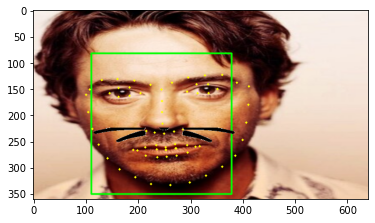

In [8]:
img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()